# Import all the libraries

In [3]:
# Import all the libraries
import os 
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report

# Exploratory Data Analysis

In [5]:
# lets take the image file from each directory
glioma_tumor="/home/jupyter/imported/Data/glioma_tumor"
glioma_files = os.listdir(glioma_tumor)

meningioma_tumor="/home/jupyter/imported/Data/meningioma_tumor"
meningioma_files = os.listdir(meningioma_tumor)

normal="/home/jupyter/imported/Data/normal"
normal_files = os.listdir(normal)

pituitary_tumor="/home/jupyter/imported/Data/pituitary_tumor"
pituitary_files= os.listdir(pituitary_tumor)

# Visualize the number of images in each directory

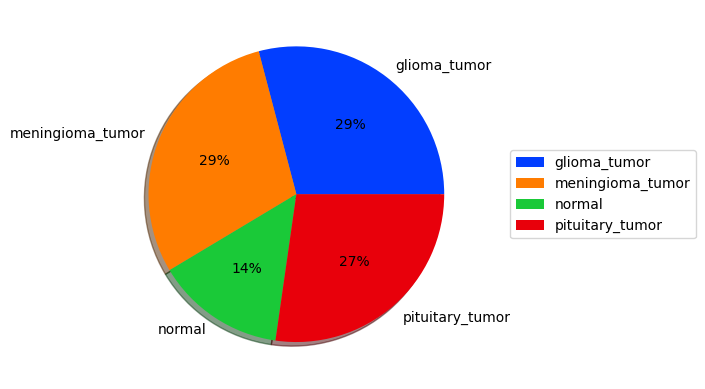

In [6]:
# declaring data 
data = [len(glioma_files), len(meningioma_files), len(normal_files),len(pituitary_files)] 
keys = ['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor'] 

# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 

# plotting data on chart 
plt.pie(data, labels=keys, colors=palette_color,autopct='%.0f%%', shadow=True) 
plt.legend(loc='center right',  bbox_to_anchor=(1.6, 0.5))

# displaying chart 
plt.show() 


# Lets create the Training data 

In [7]:
# Lets create the Training data 
image_directory="/home/jupyter/imported/Data"
batch_size = 32
img_height = 224
img_width = 224
train_data = tf.keras.utils.image_dataset_from_directory(image_directory,
                                                         validation_split=0.2,
                                                         seed=123,
                                                         subset="training",
                                                         image_size=(img_height, img_width),
                                                         batch_size=batch_size)

Found 3096 files belonging to 4 classes.
Using 2477 files for training.


2023-11-19 20:23:12.424783: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-11-19 20:23:12.424877: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gpu-vm-001): /proc/driver/nvidia/version does not exist
2023-11-19 20:23:12.430392: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Print the name of four different classes 

In [8]:
# Print the name of four different classes 
class_names =train_data.class_names
print(class_names)

['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']


In [9]:
# Lets check how many batches are created in training data
total_images_train_data=2477
num_batches=total_images_train_data/32
num_batches

77.40625

In [10]:
len(train_data)

78

> Here we can see that there are total 78 batches are created and each batch contain 32 images 

# Lets Check the shape and label of image in first batch of training data

In [11]:
# Lets check the shape and label of single image in first batch of training data
for image_batch, labels_batch in train_data.take(1):
    print(f"Shape of the image in one batch is: {image_batch.shape}")
    print(f"Total labels contained in one batch:{labels_batch.shape}")
    print(f"Visualise the single image in form of tensors:{image_batch[0]}")
    print(f"lable of image is:{class_names[labels_batch[0]]}")
    

2023-11-19 20:23:12.571485: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Shape of the image in one batch is: (32, 224, 224, 3)
Total labels contained in one batch:(32,)
Visualise the single image in form of tensors:[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
lable of image is:meningioma_tumor


So, here we can see that the batch size is 32 and shape of image is (224,224,3) and there are 32 corresponding labels.

# Create the Validation data 

In [12]:
# Lets create the Validation data 
val_data = tf.keras.utils.image_dataset_from_directory(image_directory,
                                                       validation_split=0.2,
                                                       subset="validation",
                                                       seed=123,
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size)

Found 3096 files belonging to 4 classes.
Using 619 files for validation.


# Lets Visualize the images

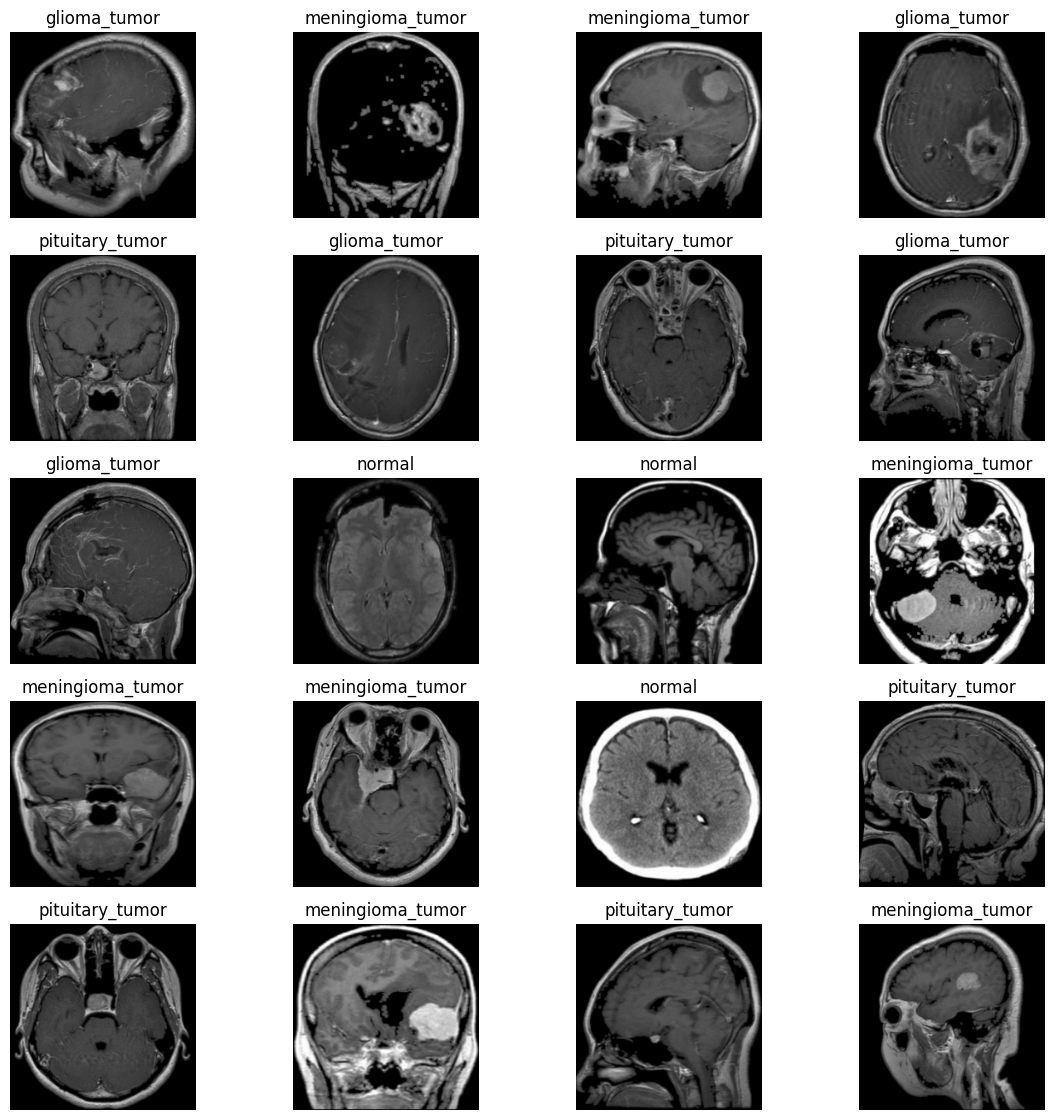

In [13]:
# See the images of tumor
plt.figure(figsize=(14, 14))
for images, labels in train_data.take(1):
    for i in range(20):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Transfer Learning-- We use the pretrained model ResNet50 architecture to train the model

In [14]:
# Create base model with tf.keras.applications
base_model =tf.keras.applications.resnet.ResNet50(include_top=False)


# Freeze the base model (so the pre-learned patterns remain same)
base_model.trainable = False


# Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224,3), name="input_layer")
x = base_model(inputs)


# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")


# Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)



x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(512, activation="relu")(x)
x=tf.keras.layers.Dropout(0.5)(x)

# Create the output activation layer
outputs=tf.keras.layers.Dense(4, activation="softmax",name="output_layer")(x)

# Combine the inputs with the outputs into a model
model= tf.keras.Model(inputs, outputs, name="model")



# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"]
             )


# Callbacks--> Stop training automatically once the model performance stop improving
learning_rate_reduction=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=2,factor=0.5, min_lr=0.00001,verbose =1)
Early_Stopping= tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5, restore_best_weights=True)

# Fit the model
history1= model.fit(train_data, epochs=20, validation_data= val_data,callbacks=[Early_Stopping,learning_rate_reduction], verbose=1)


94781440/94765736 [==============================] - 16s 0us/step
Shape after base_model: (None, 7, 7, 2048)
Epoch 1/20


/opt/conda/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


78/78 [==============================] - 69s 849ms/step - loss: 1.1526 - accuracy: 0.6508 - val_loss: 0.5289 - val_accuracy: 0.8061
Epoch 2/20
78/78 [==============================] - 65s 834ms/step - loss: 0.5174 - accuracy: 0.7901 - val_loss: 0.4668 - val_accuracy: 0.8352
Epoch 3/20
78/78 [==============================] - 64s 825ms/step - loss: 0.4393 - accuracy: 0.8220 - val_loss: 0.4046 - val_accuracy: 0.8675
Epoch 4/20
78/78 [==============================] - 65s 836ms/step - loss: 0.3818 - accuracy: 0.8518 - val_loss: 0.3738 - val_accuracy: 0.8740
Epoch 5/20
78/78 [==============================] - 65s 831ms/step - loss: 0.3381 - accuracy: 0.8732 - val_loss: 0.3510 - val_accuracy: 0.8869
Epoch 6/20
78/78 [==============================] - 65s 840ms/step - loss: 0.2963 - accuracy: 0.8825 - val_loss: 0.3485 - val_accuracy: 0.8885
Epoch 7/20
78/78 [==============================] - 65s 840ms/step - loss: 0.2789 - accuracy: 0.8991 - val_loss: 0.3374 - val_accuracy: 0.8901
Epoch 8/20

# Model Summary

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling_layer (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
output_layer (Dense)         (None, 4)                 2052  

# Lets Evaluate the Model

In [16]:
loss, accuracy= model.evaluate(val_data)
print(f"loss is:{loss}")
print(f"accuacy is:{accuracy}")

20/20 [==============================] - 13s 631ms/step - loss: 0.2830 - accuracy: 0.9144
loss is:0.2830123007297516
accuacy is:0.9143780469894409


# Lets see the History of Resnet50 Model

In [17]:
history_resnet50= pd.DataFrame(history1.history)
history_resnet50.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,1.152645,0.650787,0.528945,0.806139,0.001
1,0.517369,0.790069,0.466817,0.835218,0.001
2,0.439300,0.821962,0.404554,0.867528,0.001
3,0.381801,0.851837,0.373775,0.873990,0.001
4,0.338111,0.873234,0.351045,0.886914,0.001


# Lets Plot the Loss and Accuracy Curves

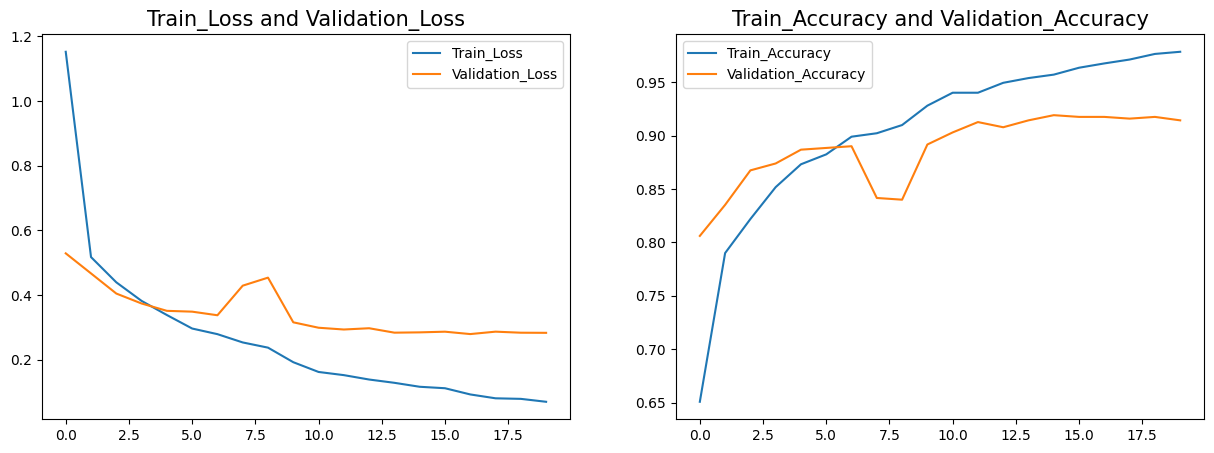

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history_resnet50['loss'],label='Train_Loss')
plt.plot(history_resnet50['val_loss'],label='Validation_Loss')
plt.title('Train_Loss and Validation_Loss',fontsize=15)
plt.legend()


plt.subplot(1,2,2)
plt.plot(history_resnet50['accuracy'],label='Train_Accuracy')
plt.plot(history_resnet50['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy and Validation_Accuracy',fontsize=15)
plt.legend()
plt.show()

# Lets make the Predictions

In [19]:
x_val=[]
y_val=[]
y_pred=[]

for images, labels in val_data:
    x_val.extend(images.numpy())
    y_val.extend(labels.numpy())
    

predictions=model.predict(np.array(x_val))
for i in predictions:
    y_pred.append(np.argmax(i))

# 

# Lets Visualize the Actual images and Predicted images

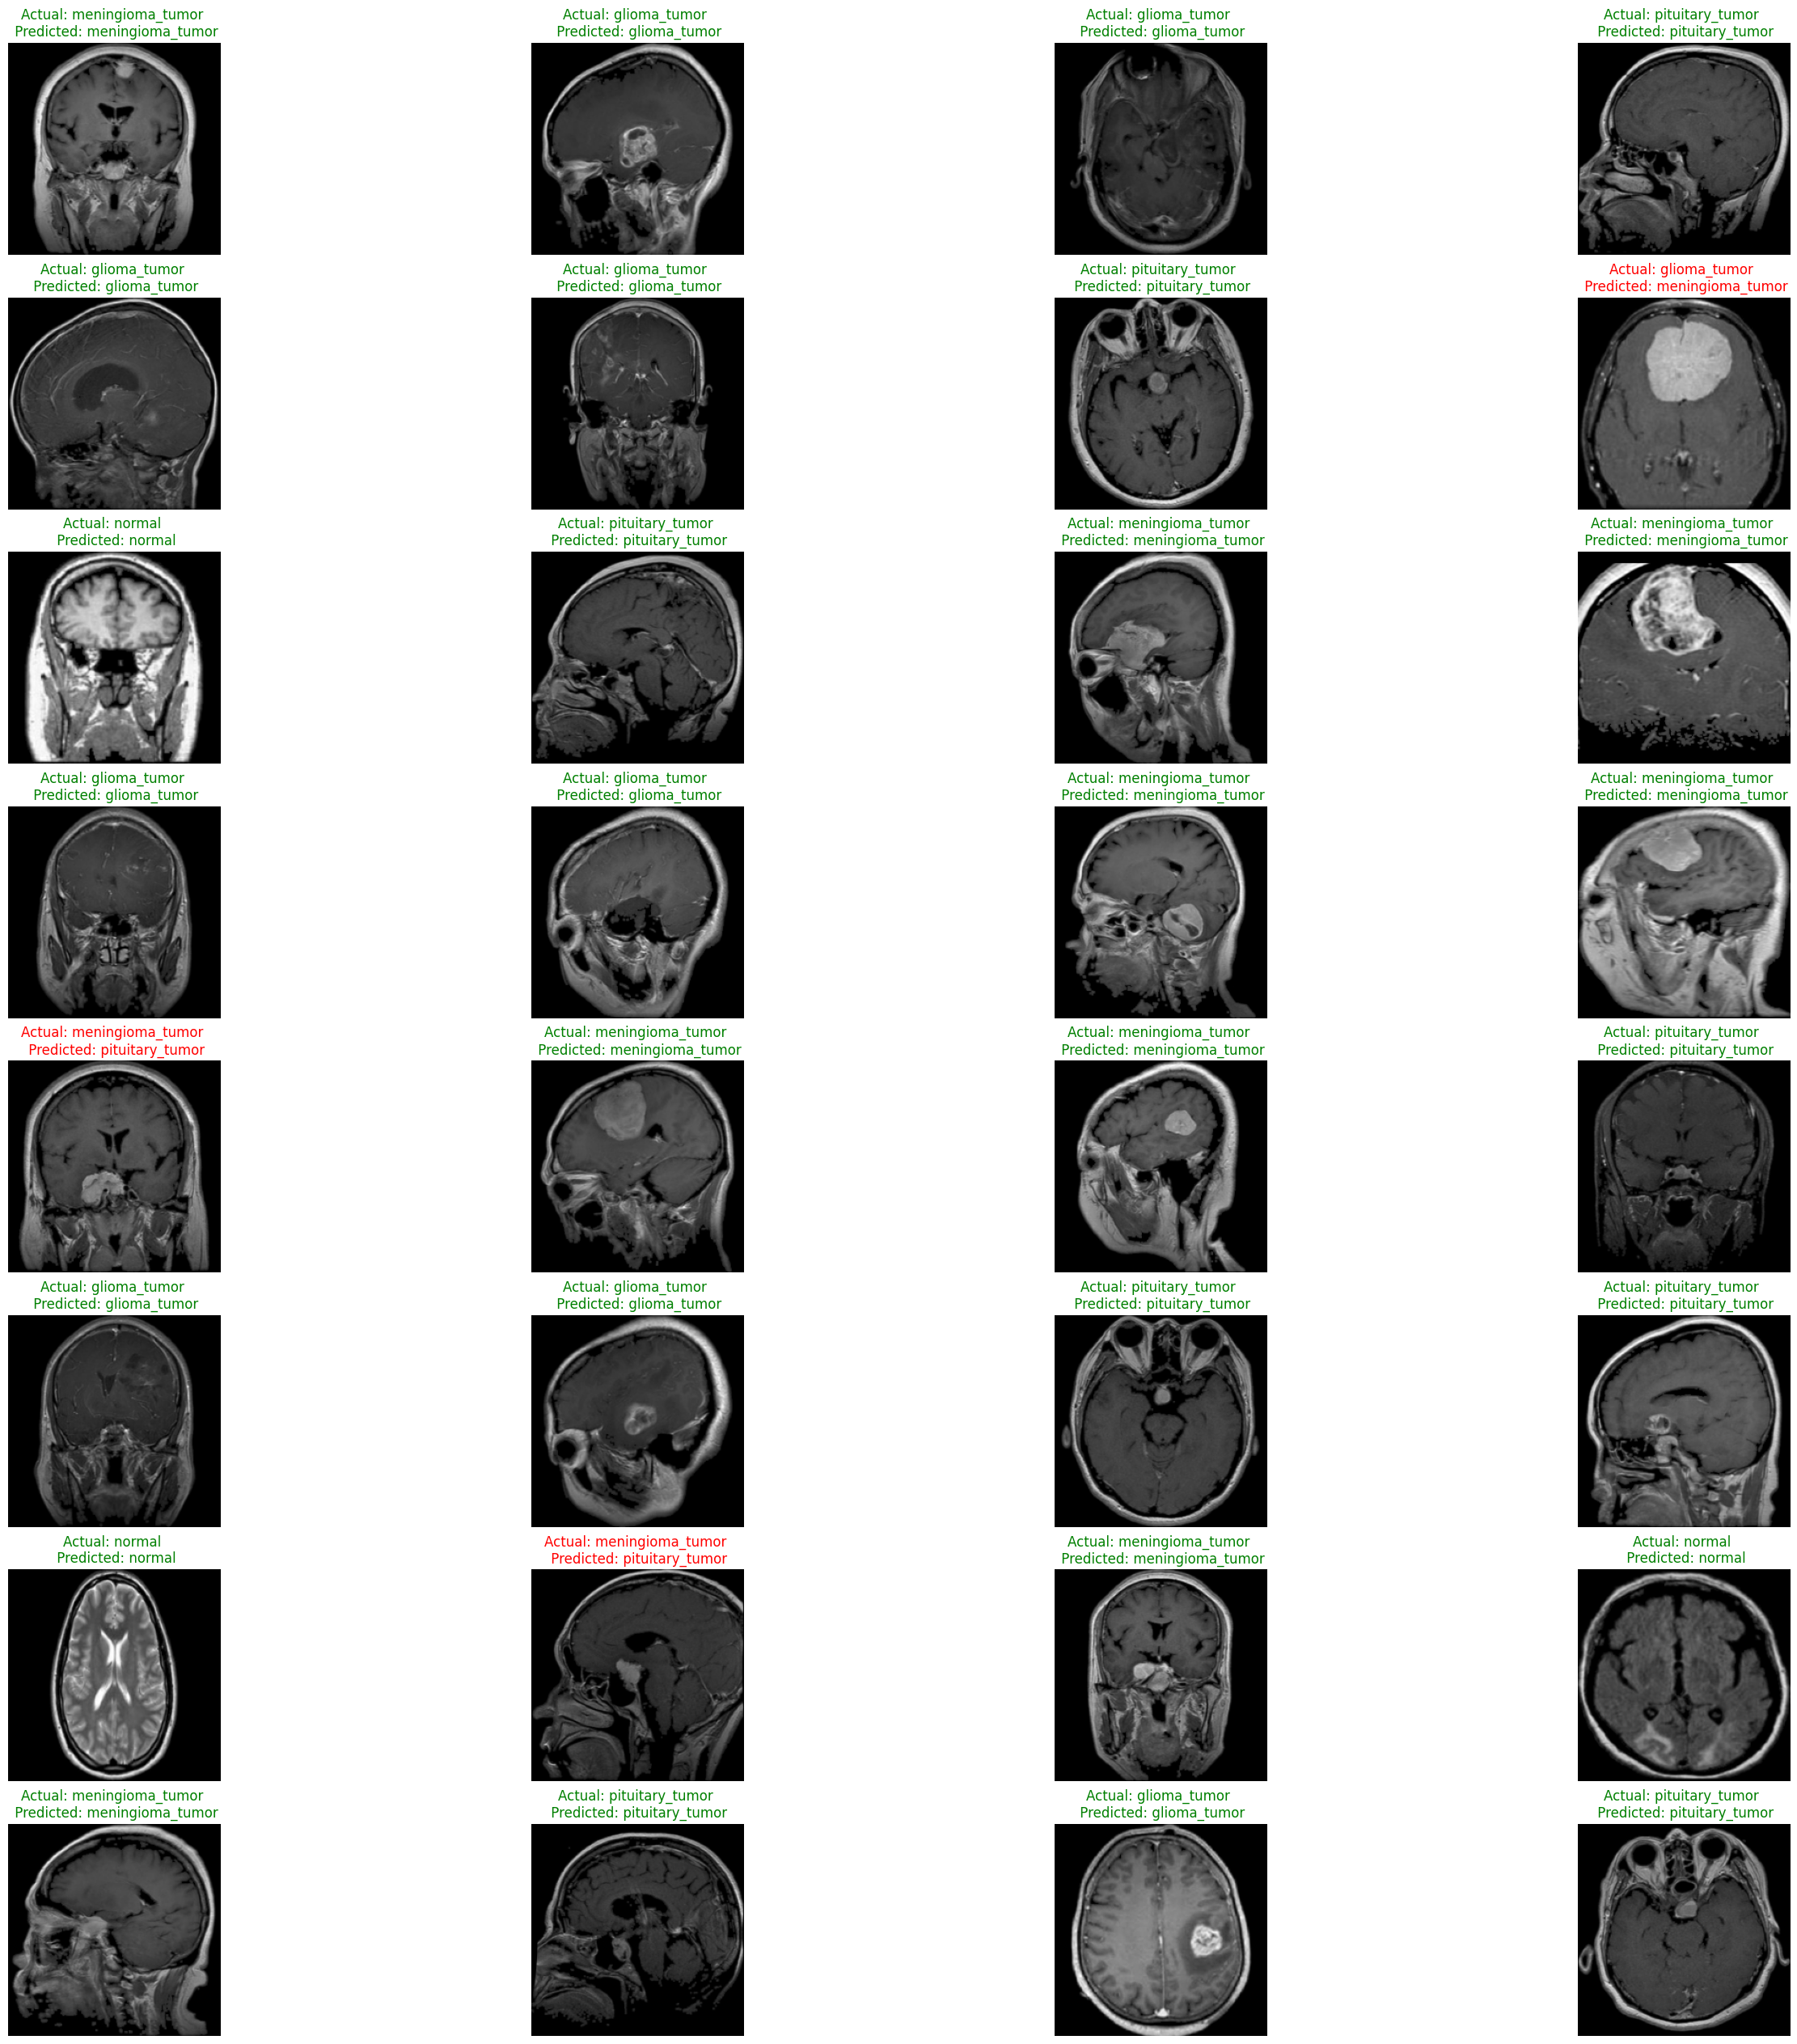

In [20]:
plt.figure(figsize=(32, 32))

for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(x_val[i].astype("uint8"))
    actual_label = class_names[y_val[i]]
    predicted_label = class_names[y_pred[i]]
    
    # Check if the actual and predicted labels are the same
    if actual_label == predicted_label:
        label_color = 'green'
    else:
        label_color = 'red'
    
    plt.title(f'Actual: {actual_label} \n Predicted: {predicted_label}', color=label_color)
    plt.axis("off")

plt.show()


# Lets Visualize the Precision,Recall,F1_Score

F1-Score:[0.9230438564708925]
Precision:[0.9250891328337486]
Recall:[0.9227794943557904]
Classification_Report
-----------------------
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       184
           1       0.84      0.90      0.87       179
           2       0.96      0.99      0.98        81
           3       0.94      0.96      0.95       175

    accuracy                           0.91       619
   macro avg       0.92      0.93      0.92       619
weighted avg       0.92      0.91      0.91       619

Confusion_Matrix
----------------------


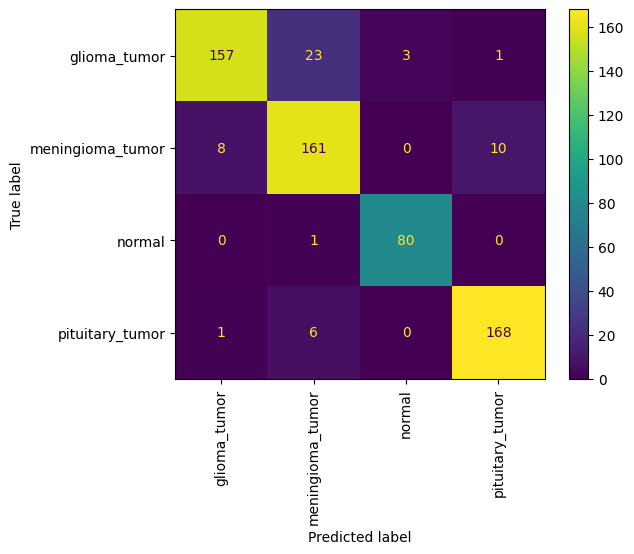

In [21]:
f1_scores=[]
precision_scores=[]
recall_scores=[]

f1_scores.append(f1_score(y_pred, y_val, average="macro"))
precision_scores.append(precision_score(y_pred, y_val, average="macro"))
recall_scores.append(recall_score(y_pred, y_val, average="macro"))


# Print the Results
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}")
print(f"Recall:{recall_scores}")



print("Classification_Report")
print("-----------------------")
print(classification_report(y_val,y_pred))
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, display_labels=class_names, xticks_rotation="vertical")
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix as a DataFrame
dataframe= pd.DataFrame(confusion_matrix(y_val, y_pred), columns=class_names, index=class_names)

# Print the DataFrame
print(dataframe)

                  glioma_tumor  meningioma_tumor  normal  pituitary_tumor
glioma_tumor               157                23       3                1
meningioma_tumor             8               161       0               10
normal                       0                 1      80                0
pituitary_tumor              1                 6       0              168
